In [2]:
#attempt #2
# Import necessary packages here, e.g.
import numpy as np               # for numerical operations
import matplotlib.pyplot as plt  # for plotting
import matplotlib.dates as mdates
import requests
import xarray as xr 
import pandas as pd
from datetime import datetime 

In [35]:
# Read the CSV file
wave_file = pd.read_csv("Sydney_Offshore_Waves_.csv")

# Strip leading/trailing spaces from column names
wave_file.columns = wave_file.columns.str.strip()

# Convert 'Date/Time' column to datetime
wave_file['Date/Time'] = pd.to_datetime(wave_file['Date/Time'], format='%m/%d/%y %H:%M')

# Set the 'Date/Time' column as the index
wave_file.set_index('Date/Time', inplace=True)

# some of my numbers were mixed with strings so I had to make sure that my columns were numeric. I also used coerce to make any invalid parsing to NaN (https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html)
wave_file['Hsig (m)'] = pd.to_numeric(wave_file['Hsig (m)'])
wave_file['WDIR_BUOY (deg TN)'] = pd.to_numeric(wave_file['WDIR_BUOY (deg TN)'], errors='coerce') #

# Select the relevant columns
waved_selected = wave_file[['Hsig (m)', 'WDIR_BUOY (deg TN)']]

# Define the start and end dates for filtering
start_date = '2016-06-01'
end_date = '2016-07-01'

# Resample the data by day ('D') and calculate the mean
waved_average = waved_selected.resample('D').mean()

# Filter the data between start_date and end_date
waved_filtered = waved_average.loc[start_date:end_date]

# Display the filtered data
display(waved_filtered)

/tmp/ipykernel_136/2594369966.py:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  wave_file = pd.read_csv("Sydney_Offshore_Waves_.csv")


,Hsig (m),WDIR_BUOY (deg TN)
Date/Time,,
2016-06-01,1.215125,139.208333
2016-06-02,1.444000,160.875000
2016-06-03,1.415792,169.125000
2016-06-04,2.518667,89.444444
2016-06-05,5.541292,99.782609
2016-06-06,3.916625,116.565217
2016-06-07,3.075167,156.125000
2016-06-08,2.251625,138.458333
2016-06-09,1.617542,132.750000


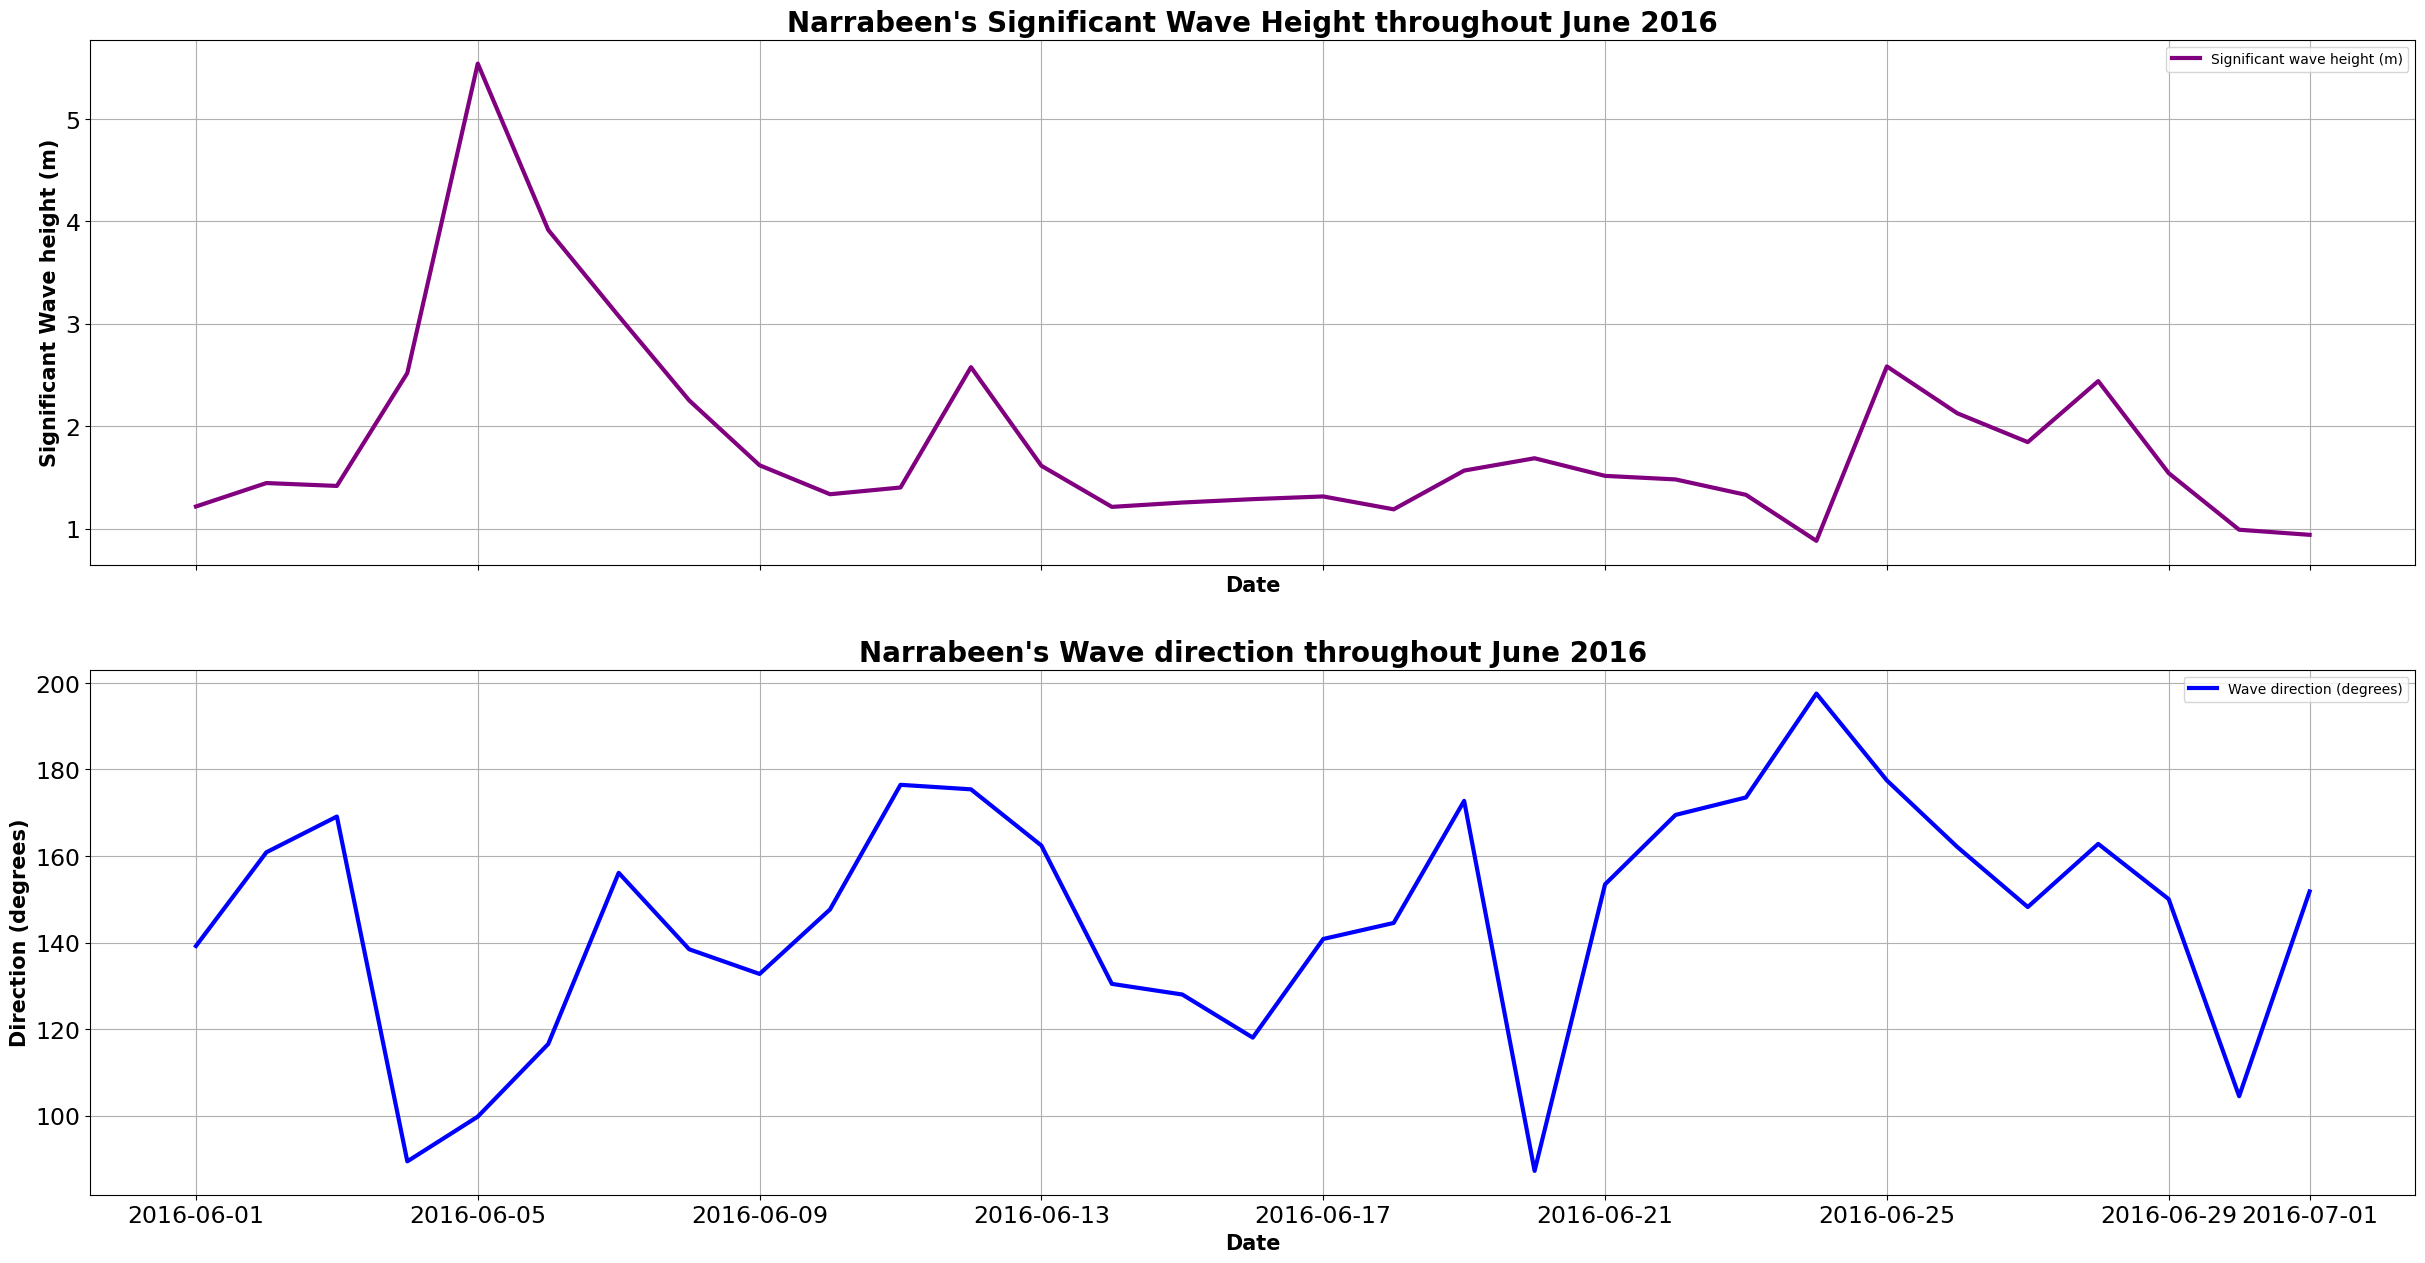

In [44]:
# make and display the first figure
import matplotlib.pyplot as plt #need to import matplotlib to create plots

fig, axs = plt.subplots(2, 1, figsize=(30, 15), sharex = True) #creates 2 blank subplots that share the same x axis scale of time

#creates first subplot on the top by specify which position (0):  
axs[0].plot(waved_filtered.index, waved_filtered["Hsig (m)"], color="purple", linestyle = '-', lw=3, label="Significant wave height (m)") 
axs[0].set_xlabel("Date", fontsize=15,  fontweight="bold") #sets x axis title 
axs[0].set_ylabel("Significant Wave height (m)", fontsize=15,  fontweight="bold")#sets y axis title
axs[0].set_title("Narrabeen's Significant Wave Height throughout June 2016", fontsize = 20,  fontweight="bold")#sets title
axs[0].legend() #add legend 
axs[0].grid() #add grid
axs[0].tick_params("x", labelsize = 17) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 17)  #makes the y-axis ticks be a larger size

#creates second subplot on the top by specify which position (1):  
axs[1].plot(waved_filtered.index, waved_filtered["WDIR_BUOY (deg TN)"], color="blue", linestyle = '-', lw=3, label= "Wave direction (degrees)") 
axs[1].set_xlabel("Date", fontsize=15,  fontweight="bold") #sets x axis title 
axs[1].set_ylabel("Direction (degrees)", fontsize=15,  fontweight="bold")#sets y axis title
axs[1].set_title("Narrabeen's Wave direction throughout June 2016", fontsize = 20,  fontweight="bold")#sets title
axs[1].legend() #add legend 
axs[1].grid() #add grid
axs[1].tick_params("x", labelsize = 17) #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 17)  #makes the y-axis ticks be a larger size

#also add legend for degrees with North (0), East 90), South (180), west (270) - r

In [37]:
#try again with these files: 

pf1shoreline_file = pd.read_csv("aus0206-0003.csv", names = ["dates", "shoreline"], index_col=0, parse_dates=True)

pf4shoreline_file=pd.read_csv("aus0206-0015.csv", names = ["dates", "shoreline"], index_col=0, parse_dates=True)

pf8shoreline_file=pd.read_csv("aus0206-0034.csv",  names = ["dates", "shoreline"], index_col=0, parse_dates=True)



In [42]:
start_date = '2013-01-01' 
end_date = '2018-01-01'

pf1 = pf1shoreline_file.loc[start_date:end_date]
pf4 = pf4shoreline_file.loc[start_date:end_date]
pf8 = pf8shoreline_file.loc[start_date:end_date]

print(pf1)
print(pf4)
print(pf8)



                     shoreline
dates                         
2013-03-18 23:39:49        NaN
2013-03-27 23:48:16      198.8
2013-04-11 23:45:47      212.7
2013-04-27 23:45:28      201.0
2013-06-14 23:45:41      187.1
...                        ...
2017-11-08 23:46:20      231.3
2017-11-24 23:46:15      251.4
2017-12-10 23:46:07      253.5
2017-12-18 23:43:54      247.9
2017-12-26 23:45:57      249.0

[104 rows x 1 columns]
                     shoreline
dates                         
2013-03-18 23:39:49      212.0
2013-03-27 23:48:16      205.4
2013-04-11 23:45:47      210.3
2013-04-27 23:45:28      213.1
2013-06-14 23:45:41      203.3
...                        ...
2017-11-08 23:46:20      232.0
2017-11-24 23:46:15      240.2
2017-12-10 23:46:07      232.9
2017-12-18 23:43:54      231.2
2017-12-26 23:45:57        NaN

[104 rows x 1 columns]
                     shoreline
dates                         
2013-03-18 23:39:49      225.2
2013-03-27 23:48:16      218.2
2013-04-11 23:45:47   

                     shoreline
dates                         
2013-03-18 23:39:49        NaN
2013-03-27 23:48:16 -25.284211
2013-04-11 23:45:47 -11.384211
2013-04-27 23:45:28 -23.084211
2013-06-14 23:45:41 -36.984211
...                        ...
2017-11-08 23:46:20   7.215789
2017-11-24 23:46:15  27.315789
2017-12-10 23:46:07  29.415789
2017-12-18 23:43:54  23.815789
2017-12-26 23:45:57  24.915789

[104 rows x 1 columns]
                     shoreline
dates                         
2013-03-18 23:39:49 -18.139583
2013-03-27 23:48:16 -24.739583
2013-04-11 23:45:47 -19.839583
2013-04-27 23:45:28 -17.039583
2013-06-14 23:45:41 -26.839583
...                        ...
2017-11-08 23:46:20   1.860417
2017-11-24 23:46:15  10.060417
2017-12-10 23:46:07   2.760417
2017-12-18 23:43:54   1.060417
2017-12-26 23:45:57        NaN

[104 rows x 1 columns]
                     shoreline
dates                         
2013-03-18 23:39:49  19.318085
2013-03-27 23:48:16  12.318085
2013-04-11 23:45:47  2

'\naxs[2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year\naxs[2].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks via matplotlib.dates\n'

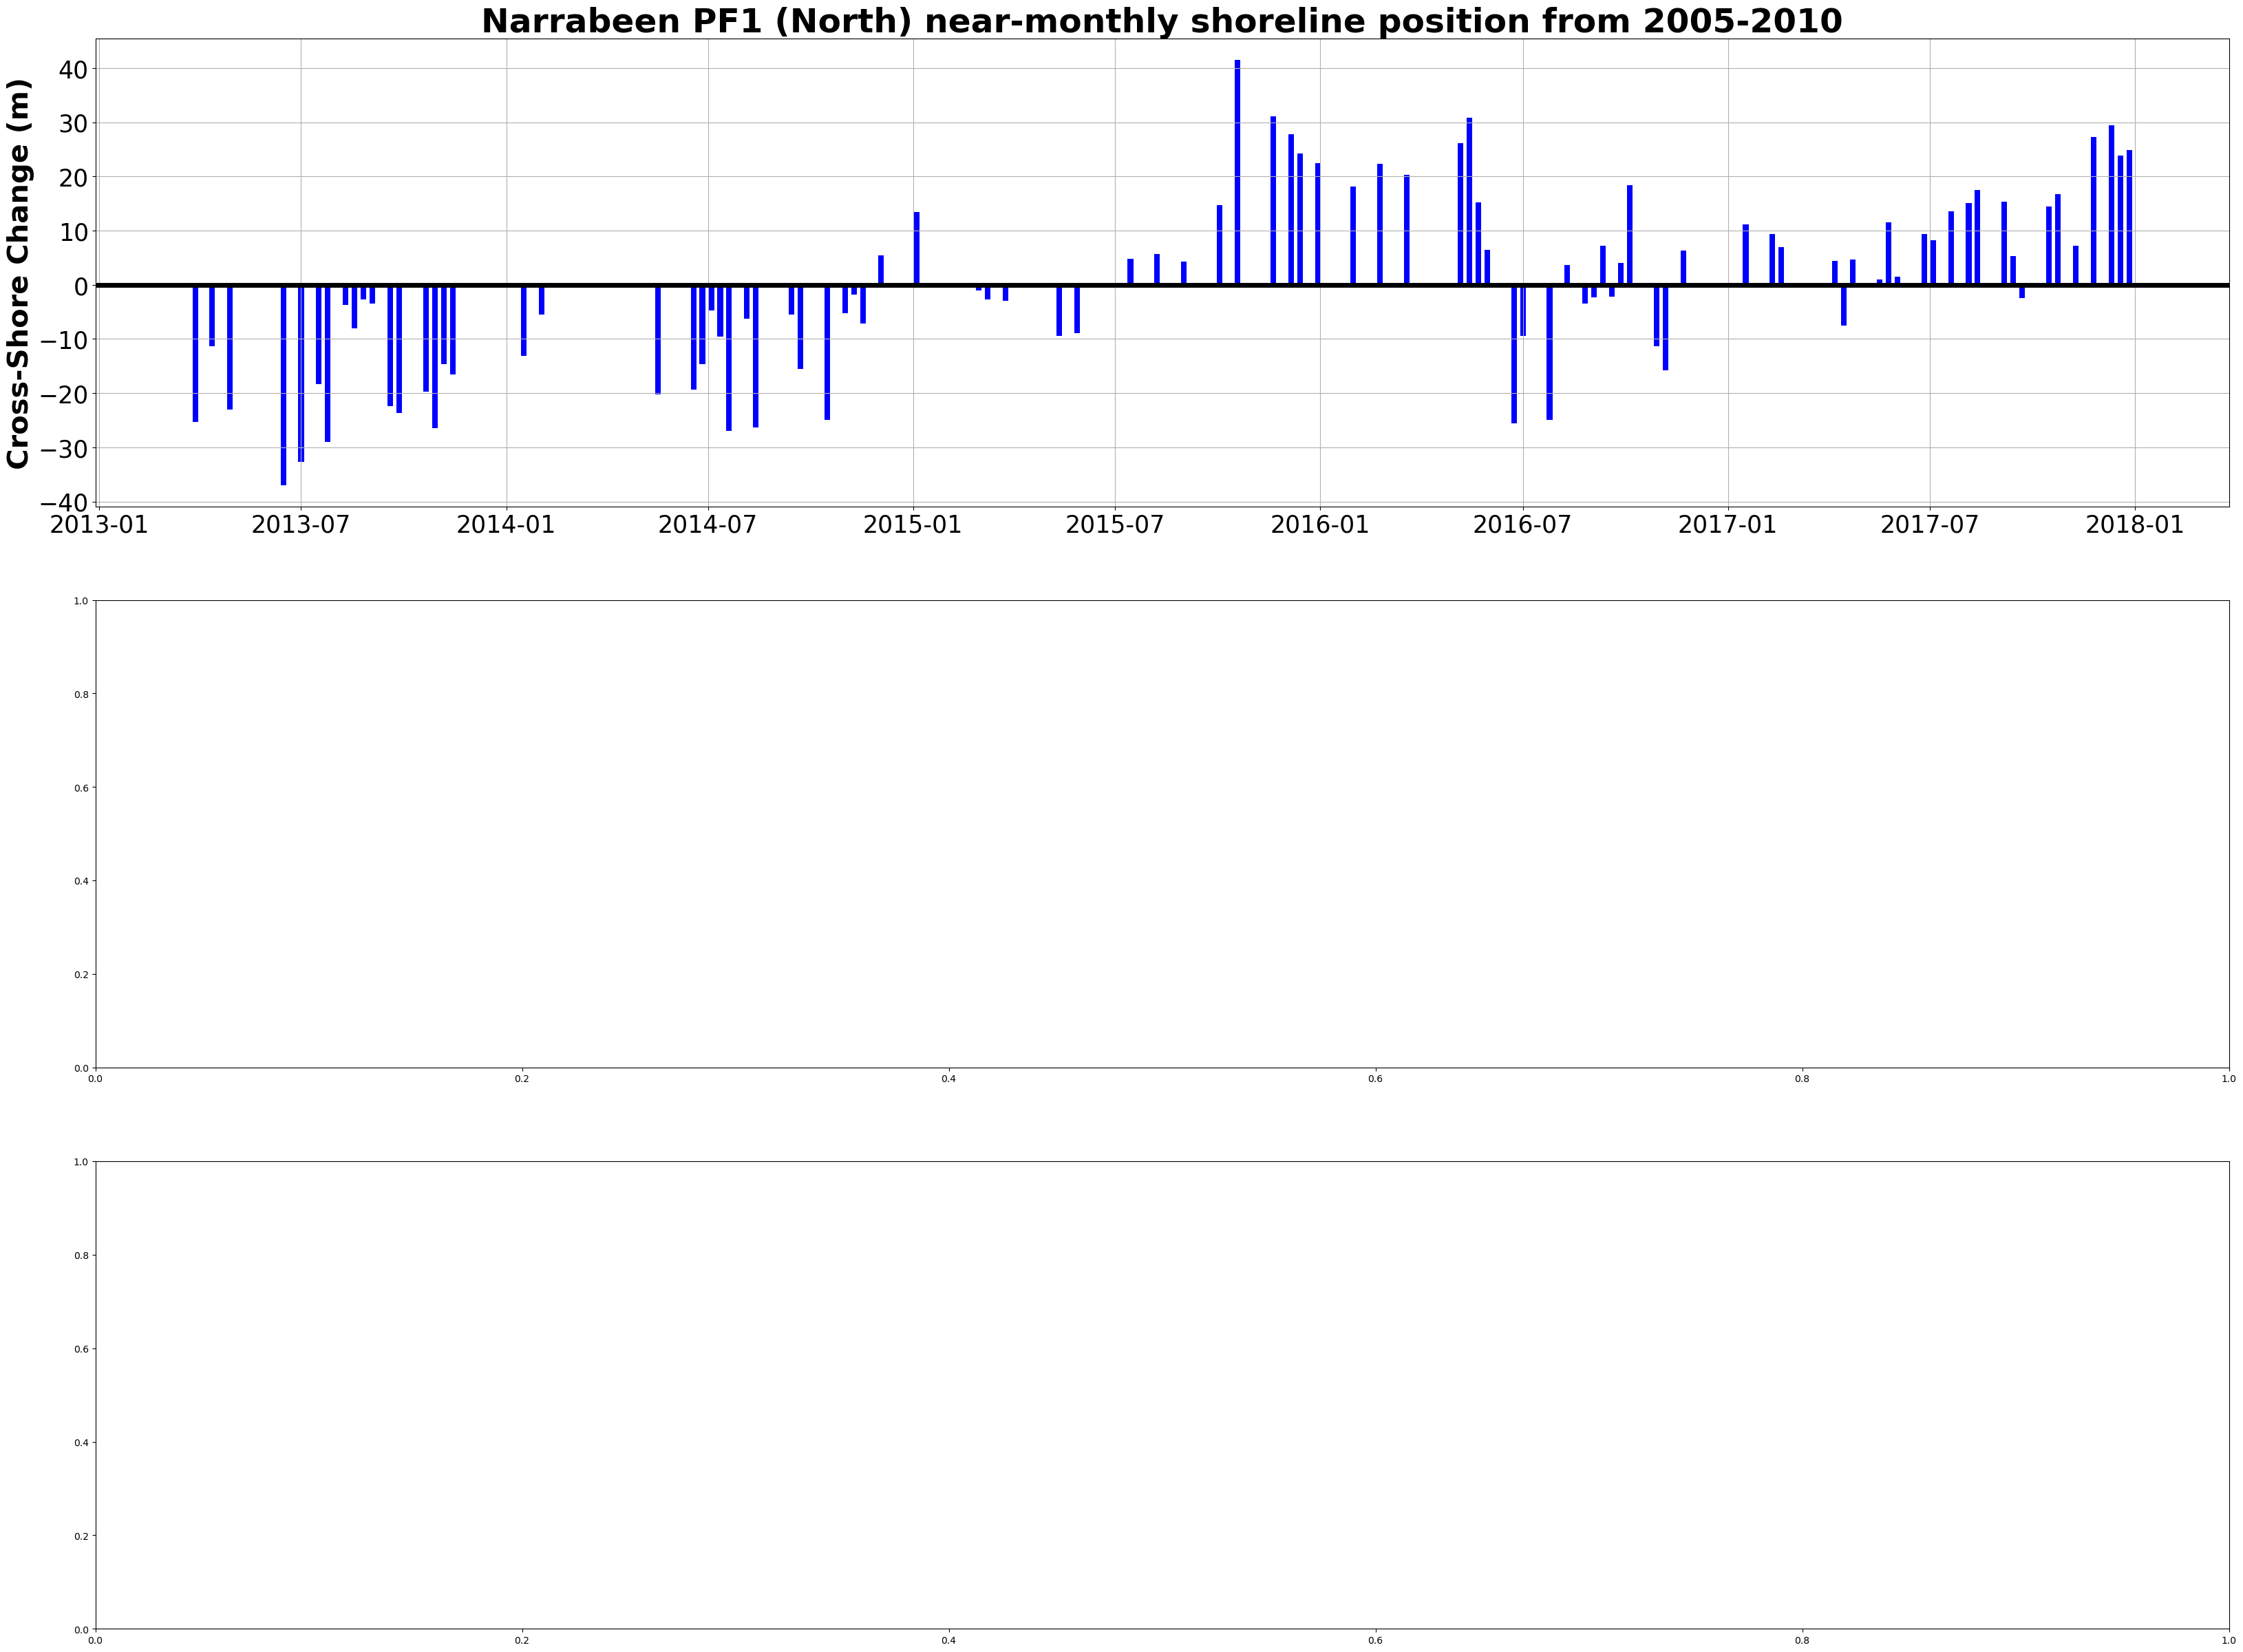

In [43]:





# mean and then take annomaly so shoreline minus mean data to get cross shore change and time on bottom 
average1 = pf1.mean()
annomaly1 = pf1-average1

average2 = pf4.mean()
annomaly2 = pf4-average2

average3 = pf8.mean()
annomaly3 = pf8-average3


print(annomaly1)
print(annomaly2)
print(annomaly3)

fig, axs = plt.subplots(3, 1, figsize=(40, 30))
axs[0].bar(annomaly1.index, annomaly1["shoreline"], width=5, color="blue") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF1
axs[0].tick_params("x", labelsize = 25) #makes the x-axis ticks be a larger size
axs[0].tick_params("y", labelsize = 25)  #makes the y-axis ticks be a larger size
axs[0].set_ylabel("Cross-Shore Change (m)", fontsize=30,  fontweight="bold") #sets y label title and size
axs[0].set_title("Narrabeen PF1 (North) near-monthly shoreline position from 2005-2010", fontsize = 35, fontweight="bold") #sets title with size
axs[0].grid() #adds grid lines
axs[0].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
axs[0].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks

'''
axs[1].bar(annomaly2.index, annomaly2["shoreline"], width=5, color="purple") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF4
axs[1].tick_params("x", labelsize = 25, color="black") #makes the x-axis ticks be a larger size
axs[1].tick_params("y", labelsize = 25) #makes the y-axis ticks be a larger size
axs[1].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #sets y label title and size
axs[1].set_title("Narrabeen PF4 (Center) near-monthly shoreline position from 2005-2010", fontsize = 35,  fontweight="bold") #sets title with size
axs[1].grid() #adds grid lines
axs[1].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
'''
'''
axs[1].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7])) #adds anotherr tick at July every year
axs[1].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks
'''
'''
axs[2].bar(annomaly3.index, annomaly3["shoreline"], width=5, color="red") #creates a bar chart that graphs time on x and cross-shore change on y, with a larger bar width in blue for PF8
axs[2].tick_params("x", labelsize = 25, color="black") #sets x label title and size
axs[2].set_xlabel("Date", fontsize=30, fontweight="bold") #makes the x-axis ticks be a larger size
axs[2].tick_params("y", labelsize = 25)  #sets y label title and size
axs[2].set_ylabel("Cross-Shore Change (m)", fontsize=35,  fontweight="bold") #makes the y-axis ticks be a larger size
axs[2].set_title("Narrabeen PF8 (South) near-monthly shoreline position from 2005-2010", fontsize = 35,  fontweight="bold") #sets title with size
axs[2].grid() #adds grid lines
axs[2].axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages
'''
'''
axs[2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,7]))#adds anotherr tick at July every year
axs[2].xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) #formats the way the date is on the new ticks via matplotlib.dates
'''

,Date,MEI V2
0,1/15/87,0.98
1,2/15/87,1.08
2,3/15/87,1.47
3,4/15/87,1.66
4,5/15/87,1.91


,Date,MEI V2
Date/Time,,
2010-01-15,1/15/10,0.94
2010-02-15,2/15/10,1.28
2010-03-15,3/15/10,1.31
2010-04-15,4/15/10,0.49
2010-05-15,5/15/10,-0.17
...,...,...
2019-08-15,8/15/19,0.29
2019-09-15,9/15/19,0.14
2019-10-15,10/15/19,0.27


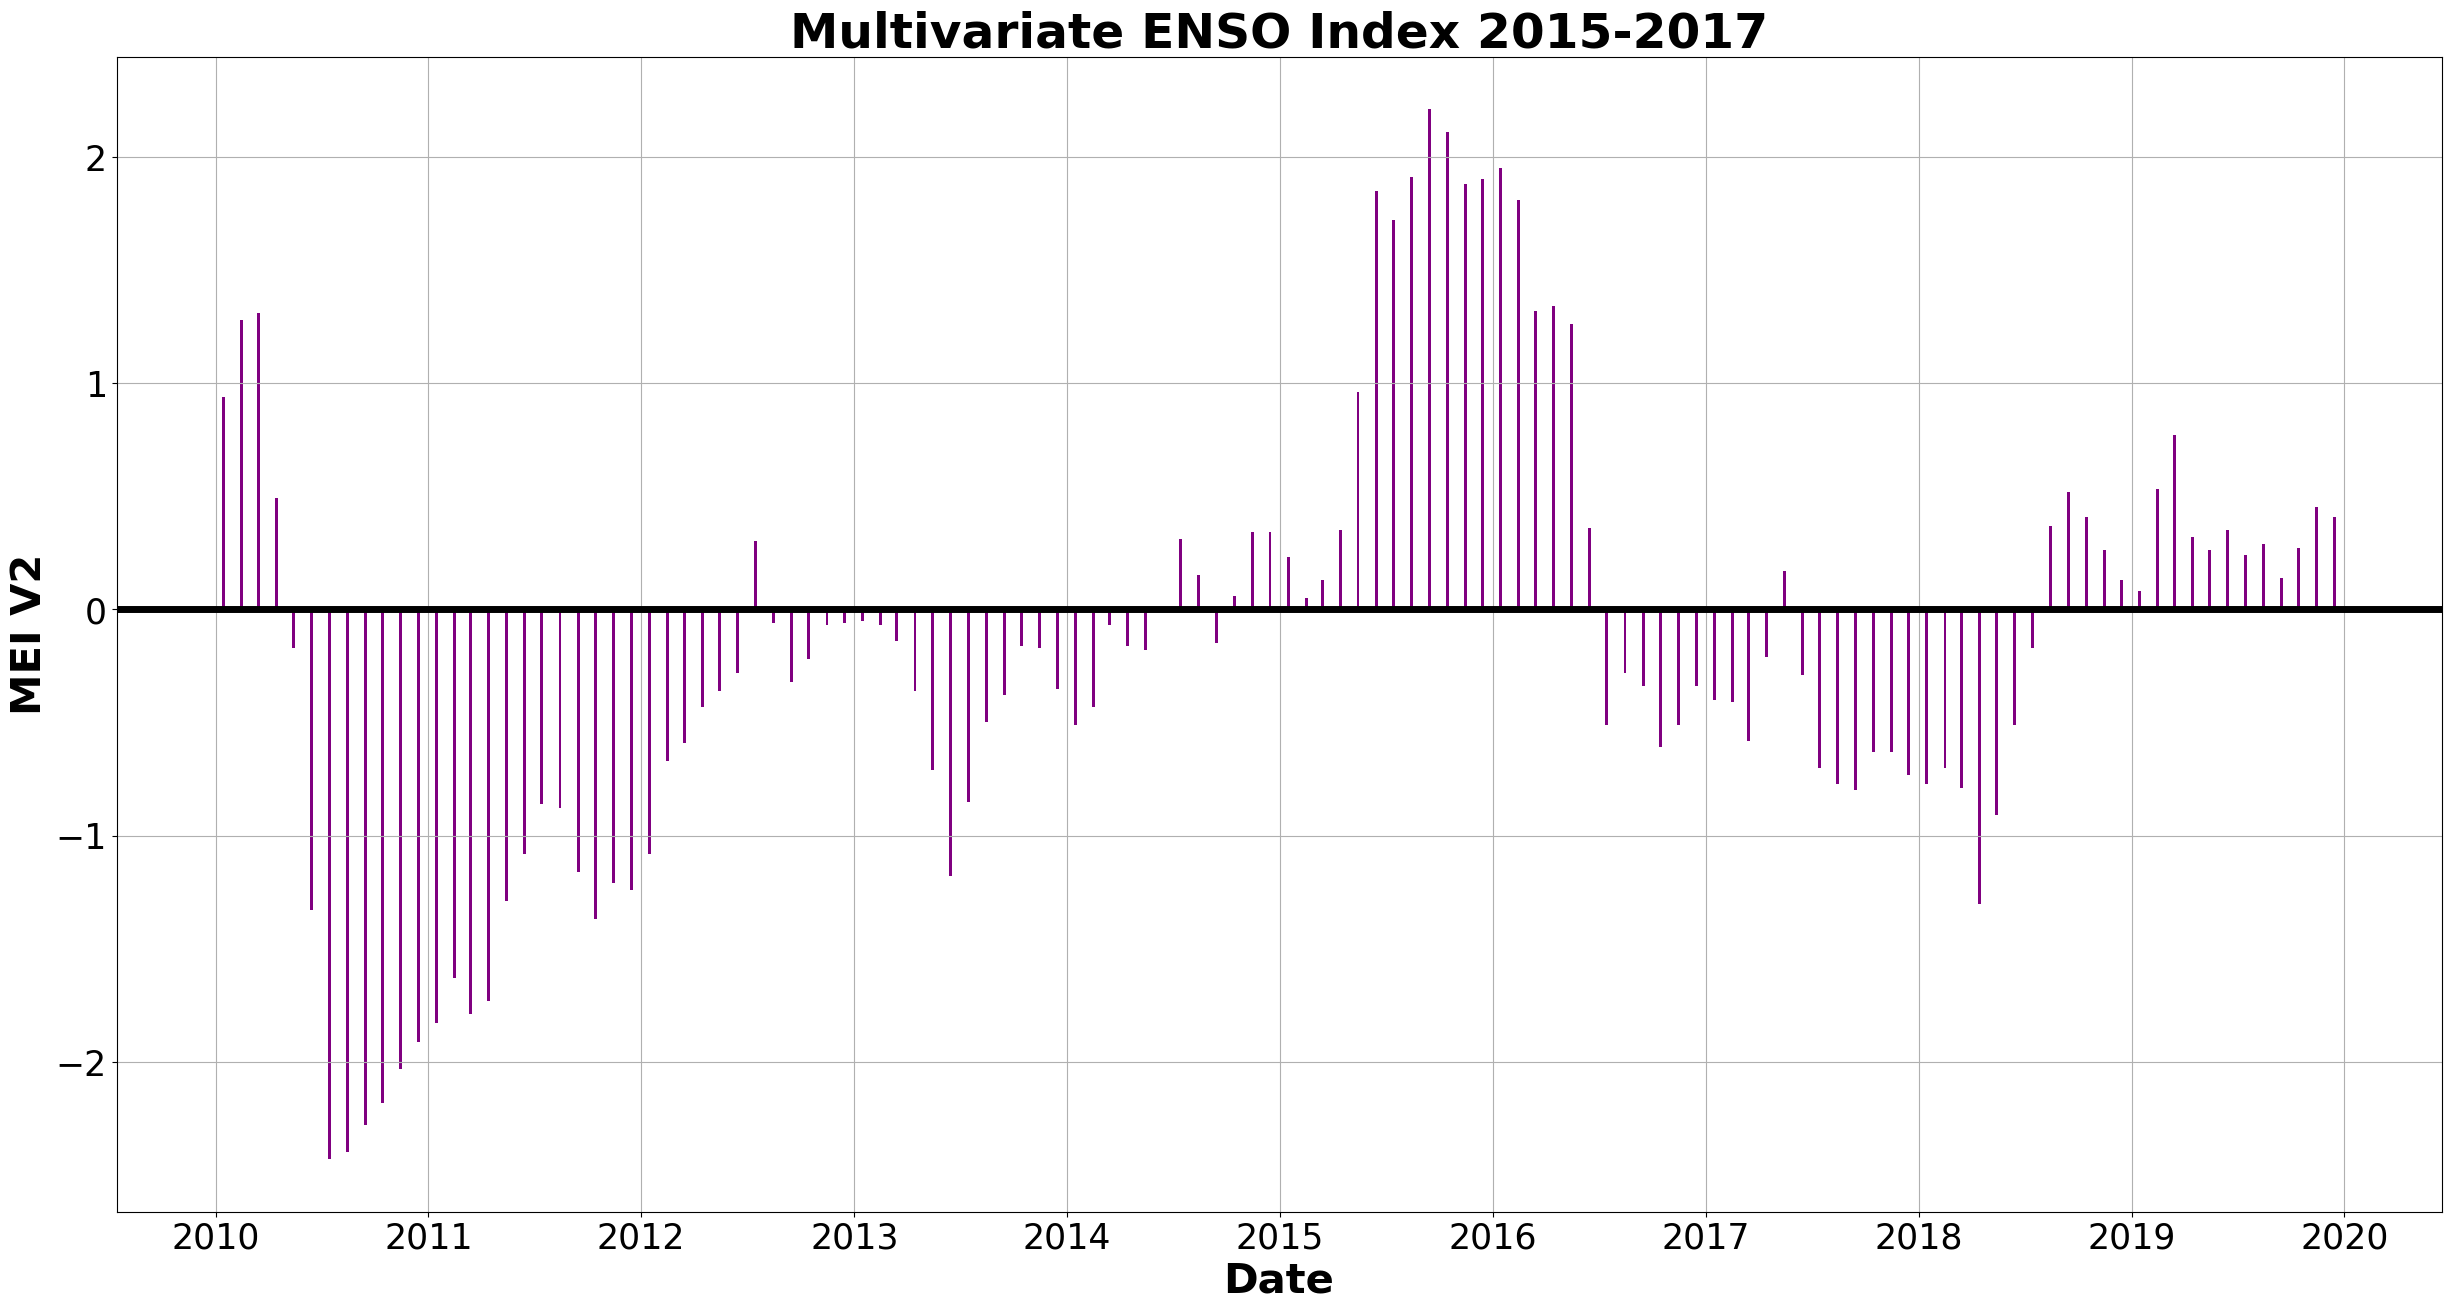

In [19]:
enso_file = pd.read_csv("NOAA_Multivariate_ENSO_Index_Version 2_1987_2024-1.csv")
display(enso_file.head())

enso_file['Date/Time'] = pd.to_datetime(enso_file['Date'], format='%m/%d/%y')

# Set the 'Date/Time' column as the index
enso_file.set_index('Date/Time', inplace=True)

start_date = '01-01-2010' 
end_date = '01-01-2020'

enso = enso_file.loc[start_date:end_date]
display(enso)

fig, axs = plt.subplots(figsize=(30, 15)) #creates 2 blank subplots that share the same x axis scale of time
axs.bar(enso.index, enso["MEI V2"], color="purple", width=5, label="Multivariate ENSO Index (MEI V2)") 
axs.set_xlabel("Date", fontsize=30,  fontweight="bold") #sets x axis title 
axs.set_ylabel("MEI V2", fontsize=30,  fontweight="bold") #sets y label title and size
axs.tick_params("x", labelsize = 25) #makes the x-axis ticks be a larger size
axs.tick_params("y", labelsize = 25)  #makes the y-axis ticks be a larger size
axs.set_title("Multivariate ENSO Index 2015-2017", fontsize = 35, fontweight="bold") #sets title with size
axs.grid() #adds grid lines
axs.axhline(y = 0, color = 'black', linestyle = '-', lw=5)  #adds a line at line zero so its easier to see the moving averages

In [ ]:
#NOAA’s bi-monthly Multivariate El Nino/Southern Oscillation (ENSO) index (MEI.v2). Positive MEI values indicate El Nino (depicted in red), while negative MEI values indicate La Nina (depicted in blue) (plot from PSL Web Team n.d.). 